# Retail Data Wrangling and Analytics

In [2]:
# Import modules 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load Data from CSV File to a Dataframe

In [3]:
url = "https://raw.githubusercontent.com/jarviscanada/jarvis_data_eng_demo/feature/data/python_data_wrangling/data/online_retail_II.csv"
retail_df = pd.read_csv(url)
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
# Rename columns to snakecase
new_column_names = ['invoice', 'stock_code', 'description', 'quantity', 'invoice_date', 'price', 'customer_id', 'country']
retail_df.columns = new_column_names
retail_df.head()

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
# Convert invoice_date data type
retail_df['invoice_date'] = pd.to_datetime(retail_df['invoice_date'])

# Total Invoice Amount Distribution

In [6]:
# Calculate the invoice total amount, excluding invoices with negative amount
retail_df['invoice_amount'] = retail_df['quantity'] * retail_df['price']
invoice_total = retail_df[retail_df['invoice_amount'] > 0].groupby('invoice')['invoice_amount'].sum()
invoice_total

invoice
489434       505.30
489435       145.80
489436       630.33
489437       310.75
489438      2286.24
             ...   
581585       329.05
581586       339.20
581587       267.45
A563185    11062.06
C496350      373.57
Name: invoice_amount, Length: 40078, dtype: float64

Minimun: 0.19
Maximun: 168469.6
Median: 304.3150000000001
Mode: 15.0
Mean: 523.3037611158244


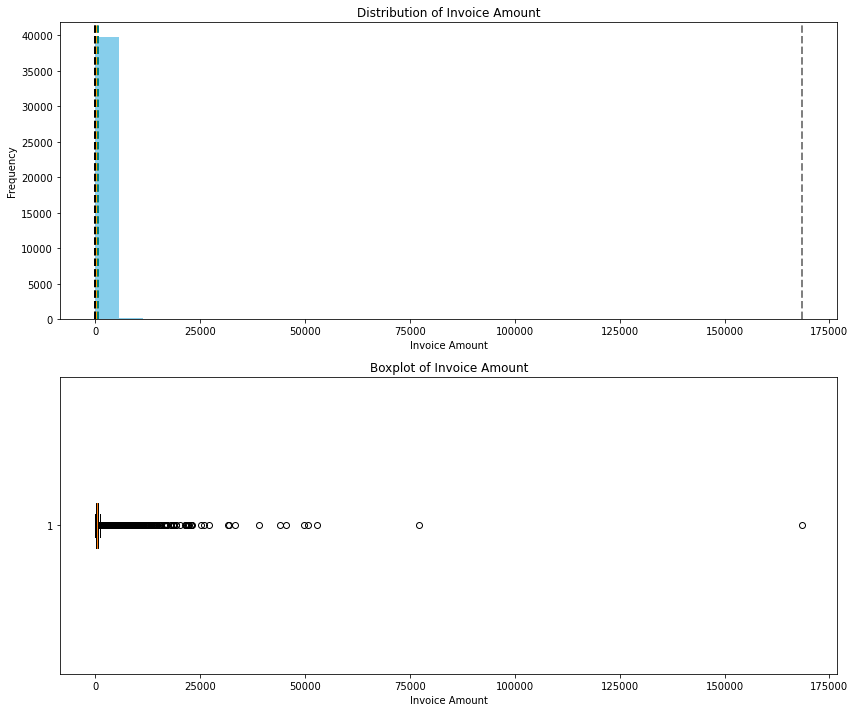

In [84]:
min_amount = invoice_total.min()
max_amount = invoice_total.max()
median_amount = invoice_total.median()
mode_amount = invoice_total.mode().iloc[0]
mean_amount = invoice_total.mean()

# Display individual values
print(f"Minimun: {min_amount}")
print(f"Maximun: {max_amount}")
print(f"Median: {median_amount}")
print(f"Mode: {mode_amount}")
print(f"Mean: {mean_amount}")

# Distribution plot and boxplot of invoice amount
plt.figure(figsize=(12, 10))

# Top subplot (Distribution)
plt.subplot(2, 1, 1)
plt.hist(invoice_total, bins=30, color='skyblue')
plt.axvline(invoice_total.min(), color='grey', linestyle='dashed', linewidth=2, label='Min')
plt.axvline(invoice_total.max(), color='grey', linestyle='dashed', linewidth=2, label='Max')
plt.axvline(invoice_total.median(), color='orange', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(invoice_total.mode().iloc[0], color='black', linestyle='dashed', linewidth=2, label='Mode')
plt.axvline(invoice_total.mean(), color='teal', linestyle='dashed', linewidth=2, label='Mean')

plt.title('Distribution of Invoice Amount')
plt.xlabel('Invoice Amount')
plt.ylabel('Frequency')

# Bottom subplot (Boxplot)
plt.subplot(2, 1, 2)
plt.boxplot(invoice_total, vert=False)
plt.title('Boxplot of Invoice Amount')
plt.xlabel('Invoice Amount')

plt.tight_layout()
plt.show()

In [8]:
# The first 85 quantiles of the invoice amount data

quantile_85 = invoice_total.quantile(0.85)
remove_outliers = invoice_total[invoice_total <= quantile_85]

min_amount = remove_outliers.min()
max_amount = remove_outliers.max()
median_amount = remove_outliers.median()
mode_amount = remove_outliers.mode().iloc[0]
mean_amount = remove_outliers.mean()

# Display individual values
print(f"Minimun: {min_amount}")
print(f"Maximun: {max_amount}")
print(f"Median: {median_amount}")
print(f"Mode: {mode_amount}")
print(f"Mean: {mean_amount}")

Minimun: 0.19
Maximun: 724.2499999999999
Median: 256.235
Mode: 15.0
Mean: 271.68389129924515


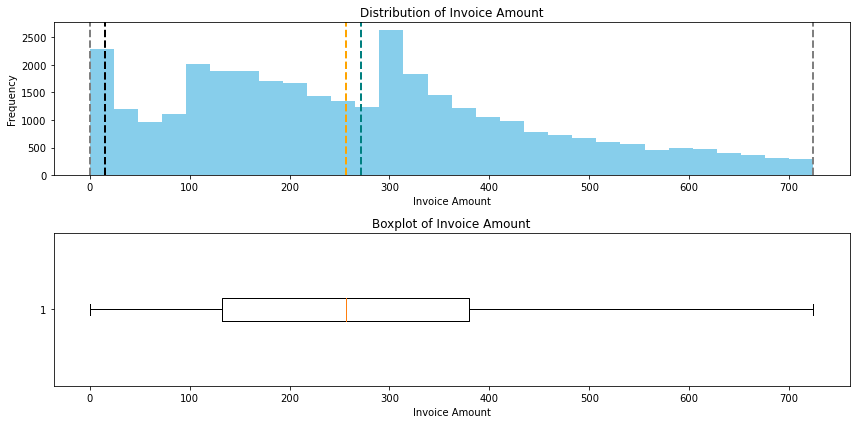

In [83]:
# Draw the distribution for the first 85 quantiles of the invoice amount data
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.hist(remove_outliers, bins=30, color='skyblue')
plt.axvline(remove_outliers.min(), color='grey', linestyle='dashed', linewidth=2, label='Min')
plt.axvline(remove_outliers.max(), color='grey', linestyle='dashed', linewidth=2, label='Max')
plt.axvline(remove_outliers.median(), color='orange', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(remove_outliers.mode().iloc[0], color='black', linestyle='dashed', linewidth=2, label='Mode')
plt.axvline(remove_outliers.mean(), color='teal', linestyle='dashed', linewidth=2, label='Mean')

plt.title('Distribution of Invoice Amount')
plt.xlabel('Invoice Amount')
plt.ylabel('Frequency')

# Bottom subplot (Boxplot)
plt.subplot(2, 1, 2)
plt.boxplot(remove_outliers, vert=False)
plt.title('Boxplot of Invoice Amount')
plt.xlabel('Invoice Amount')

plt.tight_layout()
plt.show()

# Monthly Placed and Canceled Orders

In [9]:
# Create new integer column 'year_month' with YYYYMM format
retail_df['year_month'] = retail_df['invoice_date'].dt.strftime('%Y%m')
retail_df['year_month'] = retail_df['year_month'].astype(int)
retail_df.head()

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country,invoice_amount,year_month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,200912
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,200912
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,200912
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,200912
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,200912


In [10]:
# Total orders per month
monthly_total_orders = retail_df.groupby('year_month')['invoice'].nunique()
monthly_total_orders.head()

year_month
200912    2330
201001    1633
201002    1969
201003    2367
201004    1892
Name: invoice, dtype: int64

In [11]:
# Total cancelled orders (cancelled invoice)
cancelled_orders = retail_df[retail_df['invoice'].str.startswith('C')]

# Cancelled orders per month
monthly_cancelled_orders = cancelled_orders.groupby('year_month')['invoice'].nunique()
monthly_cancelled_orders.head()

year_month
200912    401
201001    300
201002    240
201003    407
201004    304
Name: invoice, dtype: int64

In [12]:
# Placed orders per month
monthly_placed_orders = monthly_total_orders - 2 * monthly_cancelled_orders
monthly_placed_orders.head()

year_month
200912    1528
201001    1033
201002    1489
201003    1553
201004    1284
Name: invoice, dtype: int64

In [13]:
# Convert 'monthly_cancelled_orders' and 'monthly_placed_orders' Series to DataFrames
monthly_cancelled_orders_df = monthly_cancelled_orders.to_frame(name='cancelled_orders')
monthly_placed_orders_df = monthly_placed_orders.to_frame(name='placed_orders')

# Merge 2 dataframes based on 'year_month' column
merged_df = pd.merge(monthly_placed_orders_df, monthly_cancelled_orders_df, left_index=True, right_index=True)
merged_df.head()

,placed_orders,cancelled_orders
year_month,,
200912,1528,401
201001,1033,300
201002,1489,240
201003,1553,407
201004,1284,304


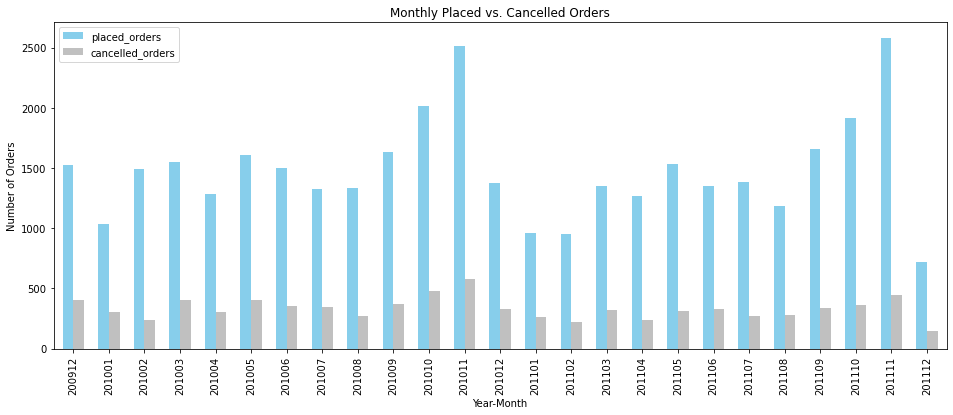

In [81]:
# Plot the chart
orders_plot = merged_df.plot(kind='bar', width=0.6, figsize=(16, 6), color = ['skyblue', 'silver'])
orders_plot.set_title('Monthly Placed vs. Cancelled Orders')
orders_plot.set_xlabel('Year-Month')
orders_plot.set_ylabel('Number of Orders')

plt.show()

# Monthly Sales

In [15]:
monthly_sales = retail_df.groupby('year_month')['invoice_amount'].sum()
monthly_sales = monthly_sales.to_frame(name = 'sales')
monthly_sales.head()

,sales
year_month,
200912,799847.110
201001,624032.892
201002,533091.426
201003,765848.761
201004,590580.432


In [23]:
monthly_sales.index.dtype

dtype('O')

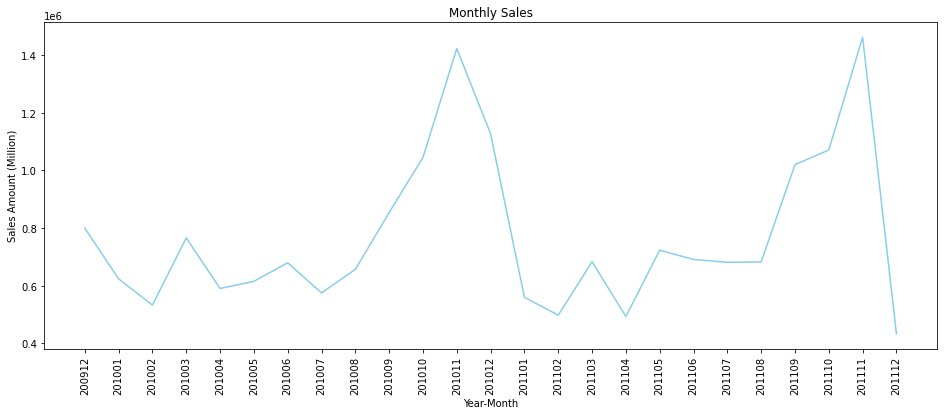

In [80]:
monthly_sales.index = monthly_sales.index.astype(str)
plt.figure(figsize=(16,6))
plt.plot(monthly_sales.index, monthly_sales['sales'], color='skyblue')

plt.title('Monthly Sales')
plt.xlabel('Year-Month')
plt.ylabel('Sales Amount (Million)')
plt.xticks(rotation=90)

plt.show()

# Monthly Sales Growth


In [20]:
# Calculate monthly sales percentage growth
monthly_sales['growth'] = monthly_sales['sales'].pct_change() * 100
monthly_sales['growth'] = monthly_sales['growth'].round(2)
monthly_sales.head()

,sales,growth
year_month,,
200912,799847.110,NaN
201001,624032.892,-21.98
201002,533091.426,-14.57
201003,765848.761,43.66
201004,590580.432,-22.89


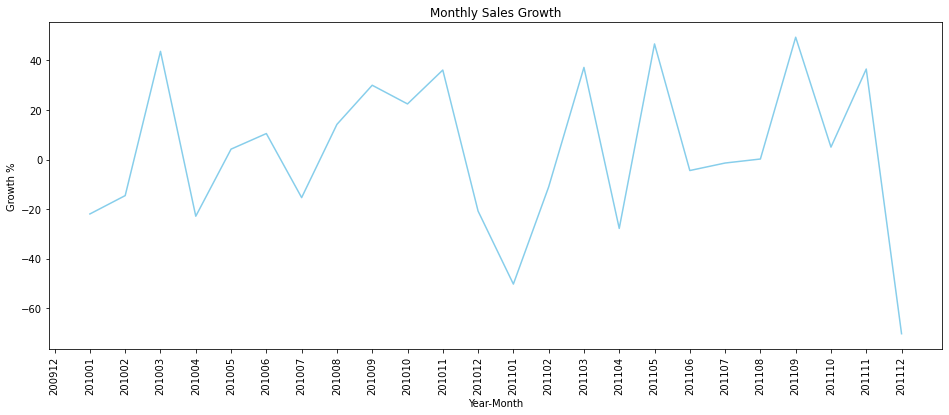

In [128]:
# Plot a chart to show the growth percentage
plt.figure(figsize=(16,6))
plt.plot(monthly_sales.index, monthly_sales['growth'], color='skyblue')

plt.title('Monthly Sales Growth')
plt.xlabel('Year-Month')
plt.ylabel('Growth %')
plt.xticks(rotation=90)

plt.show()

# Monthly Active Users

In [25]:
# Number of active users for each month
monthly_users = retail_df.groupby('year_month')['customer_id'].nunique()
monthly_users.head()

year_month
200912    1045
201001     786
201002     807
201003    1111
201004     998
Name: customer_id, dtype: int64

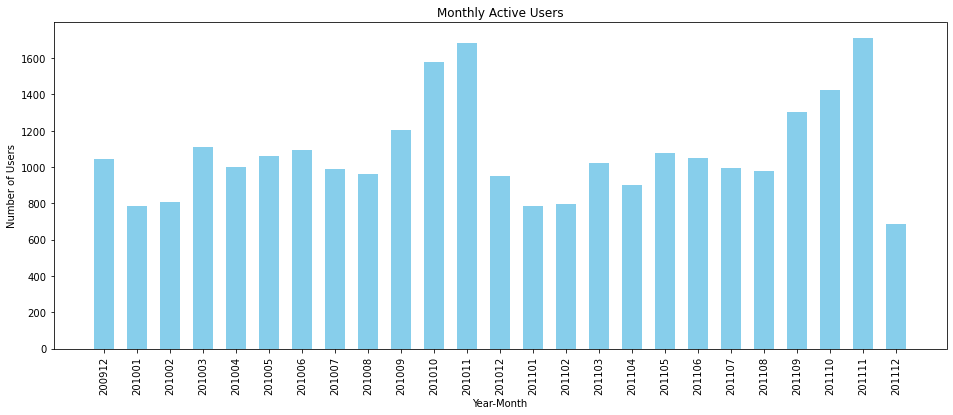

In [129]:
# Plot the bar chart
monthly_users.index = monthly_users.index.astype(str)
plt.figure(figsize=(16,6))
plt.bar(monthly_users.index, monthly_users, color='skyblue', width = 0.6)

plt.title('Monthly Active Users')
plt.xlabel('Year-Month')
plt.ylabel('Number of Users')
plt.xticks(rotation=90)

plt.show()

# New and Existing Users



In [89]:
retail_df.head()

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country,invoice_amount,year_month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,200912
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,200912
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,200912
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,200912
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,200912


In [99]:
# Find the first purchase of each user
first_purchase = retail_df.groupby('customer_id')['year_month'].min()
first_purchase_df = first_purchase.reset_index(name='year_month')
first_purchase_df.head()

,customer_id,year_month
0,12346.0,200912
1,12347.0,201010
2,12348.0,201009
3,12349.0,200912
4,12350.0,201102


In [120]:
# Join the first purchase data with the transactional data on customer_id to identify new/exiting users
joined_df = pd.merge(retail_df, first_purchase_df, on='customer_id', how='left')

# Create a new column 'user_type' with value 'Existing'
joined_df['user_type'] = 'Existing'

joined_df.head()

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country,invoice_amount,year_month_x,year_month_y,user_type
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,200912,200912.0,Existing
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,200912,200912.0,Existing
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,200912,200912.0,Existing
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,200912,200912.0,Existing
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,200912,200912.0,Existing


In [123]:
# If the 'year_month_x' matches the 'year_month_y', the user is identified as 'New'; otherwise,'Existing'
joined_df.loc[joined_df['year_month_x'] == joined_df['year_month_y'], 'user_type'] = 'New'
joined_df

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country,invoice_amount,year_month_x,year_month_y,user_type
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,200912,200912.0,New
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,200912,200912.0,New
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,200912,200912.0,New
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,200912,200912.0,New
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,200912,200912.0,New
...,...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,201112,201108.0,Existing
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,201112,201108.0,Existing
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,201112,201108.0,Existing
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,201112,201108.0,Existing


In [132]:
# Count the number of users for each month and user type
user_counts = joined_df.groupby(['year_month_x', 'user_type'])['customer_id'].nunique().reset_index()
user_counts.head()

,year_month_x,user_type,customer_id
0,200912,Existing,0
1,200912,New,1045
2,201001,Existing,392
3,201001,New,394
4,201002,Existing,444


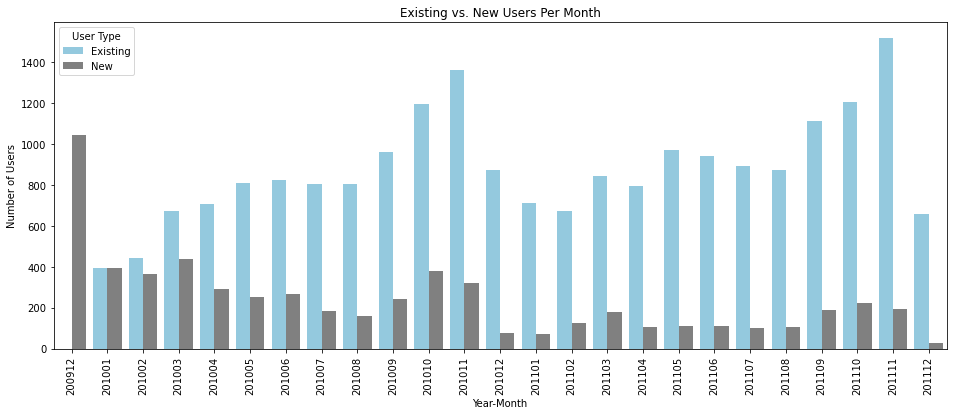

In [136]:
# Plot the number of existing and new users per month
plt.figure(figsize=(16, 6))
sns.barplot(x='year_month_x', y='customer_id', hue='user_type', data=user_counts, palette={'New': 'grey', 'Existing': 'skyblue'})

plt.title('Existing vs. New Users Per Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Users')
plt.xticks(rotation=90)
plt.legend(title='User Type')

plt.show()

## Finding RFM

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in the retail and professional services industries. ([wikipedia](https://en.wikipedia.org/wiki/RFM_(market_research)))

Optional Reading: [Making Your Database Pay Off Using Recency Frequency and Monetary Analysis](http://www.dbmarketing.com/2010/03/making-your-database-pay-off-using-recency-frequency-and-monetary-analysis/)


RFM stands for three dimensions:

- Recency – How recently did the customer purchase?

- Frequency – How often do they purchase?

- Monetary Value – How much do they spend?

Note: To simplify the problem, let's keep all placed and canceled orders.


**Sample RFM table**

![](https://i.imgur.com/sXFIg6u.jpg)

In [165]:
# Get the latest purchase date of each customer
latest_purchase_date = retail_df.groupby('customer_id')['invoice_date'].max()

# Get the difference between the current date and last purchase date of each customer
current_date = pd.to_datetime('today')
recency = (current_date - latest_purchase_date).dt.days
recency.head()

customer_id
12346.0    4741
12347.0    4418
12348.0    4491
12349.0    4434
12350.0    4726
Name: invoice_date, dtype: int64

In [166]:
# Get the purchase frequency of each customer
frequency = retail_df.groupby('customer_id')['invoice'].nunique()
frequency.head()

customer_id
12346.0    17
12347.0     8
12348.0     5
12349.0     5
12350.0     1
Name: invoice, dtype: int64

In [169]:
# Get the total monetary values of each customer
monetary = retail_df.groupby('customer_id')['invoice_amount'].sum()
monetary.head()

customer_id
12346.0     -64.68
12347.0    5633.32
12348.0    2019.40
12349.0    4404.54
12350.0     334.40
Name: invoice_amount, dtype: float64

In [171]:
# Create the RFM table
rfm_table = pd.concat([recency, frequency, monetary], axis=1)
rfm_table.columns = ['recency', 'frequency', 'monetary']
rfm_table

,recency,frequency,monetary
customer_id,,,
12346.0,4741,17,-64.68
12347.0,4418,8,5633.32
12348.0,4491,5,2019.40
12349.0,4434,5,4404.54
12350.0,4726,1,334.40
...,...,...,...
18283.0,4419,22,2736.65
18284.0,4845,2,436.68
18285.0,5076,1,427.00


# RFM Segmentation

In [173]:
# RFM score values 
rfm_table['recency_score'] = pd.qcut(rfm_table['recency'],5,labels=[5,4,3,2,1])
rfm_table['frequency_score'] = pd.qcut(rfm_table['frequency'].rank(method="first"),5,labels=[1,2,3,4,5])
rfm_table['monetary_score'] = pd.qcut(rfm_table['monetary'],5,labels=[1,2,3,4,5])

rfm_table.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
customer_id,,,,,,
12346.0,4741,17,-64.68,2,5,1
12347.0,4418,8,5633.32,5,4,5
12348.0,4491,5,2019.40,3,3,4
12349.0,4434,5,4404.54,5,3,5
12350.0,4726,1,334.40,2,1,2


In [175]:
# RFM score values are combined side by side in str format
(rfm_table['recency_score'].astype(str) + 
 rfm_table['frequency_score'].astype(str) + 
 rfm_table['monetary_score'].astype(str)).head()

customer_id
12346.0    251
12347.0    545
12348.0    334
12349.0    535
12350.0    212
dtype: object

In [177]:
# Calculation of the RFM score
rfm_table["RFM_SCORE"] = rfm_table['recency_score'].astype(str) + rfm_table['frequency_score'].astype(str) + rfm_table['monetary_score'].astype(str)

rfm_table.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
customer_id,,,,,,,
12346.0,4741,17,-64.68,2,5,1,251
12347.0,4418,8,5633.32,5,4,5,545
12348.0,4491,5,2019.40,3,3,4,334
12349.0,4434,5,4404.54,5,3,5,535
12350.0,4726,1,334.40,2,1,2,212


In [178]:
# Transposition of the RFM table. This makes it easier to evaluate.
rfm_table.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,5942.0,4618.457085,211.881245,4416.00,4440.0000,4511.50,4797.000,5154.00
frequency,5942.0,7.552339,15.972262,1.00,2.0000,4.00,8.000,510.00
monetary,5942.0,2801.799459,13973.922553,-25111.09,325.0975,843.97,2182.005,598215.22


In [179]:
# Customers with RFM Score 555
rfm_table[rfm_table["RFM_SCORE"] == "555"].head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
customer_id,,,,,,,
12359.0,4423,14,8714.89,5,5,5,555
12362.0,4419,14,5284.58,5,5,5,555
12395.0,4431,18,5046.92,5,5,5,555
12417.0,4419,27,6708.21,5,5,5,555
12433.0,4416,11,20428.86,5,5,5,555


In [180]:
# Customers with RFM Score 111
rfm_table[rfm_table["RFM_SCORE"] == "111"].head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
customer_id,,,,,,,
12382.0,5098,1,-18.38,1,1,1,111
12387.0,4831,1,143.94,1,1,1,111
12392.0,5007,1,234.75,1,1,1,111
12400.0,4830,1,205.25,1,1,1,111
12404.0,5098,1,63.24,1,1,1,111


In [181]:
# Segmenting of customers according to recency_score and frequency_score values
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [182]:
# Create segment variable
rfm_table['segment'] = rfm_table['recency_score'].astype(str) + rfm_table['frequency_score'].astype(str)
rfm_table.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
customer_id,,,,,,,,
12346.0,4741,17,-64.68,2,5,1,251,25
12347.0,4418,8,5633.32,5,4,5,545,54
12348.0,4491,5,2019.40,3,3,4,334,33
12349.0,4434,5,4404.54,5,3,5,535,53
12350.0,4726,1,334.40,2,1,2,212,21


In [184]:
# Replace segment values from score to segment names
rfm_table['segment'] = rfm_table['segment'].replace(seg_map, regex=True)
rfm_table.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
customer_id,,,,,,,,
12346.0,4741,17,-64.68,2,5,1,251,Can't Lose
12347.0,4418,8,5633.32,5,4,5,545,Champions
12348.0,4491,5,2019.40,3,3,4,334,Need Attention
12349.0,4434,5,4404.54,5,3,5,535,Potential Loyalists
12350.0,4726,1,334.40,2,1,2,212,Hibernating


In [185]:
rfm_table[["segment", "recency","frequency","monetary"]].groupby("segment").agg(["mean","count"])

recency        frequency            monetary      
                            mean count       mean count          mean count
segment                                                                    
About to Sleep       4523.689474   380   1.460526   380    492.810900   380
At Risk              4792.094415   752   4.672872   752   1157.449162   752
Can't Lose           4737.305882    85  17.717647    85   5725.638494    85
Champions            4423.512850   856  23.532710   856  10510.937634   856
Hibernating          4881.237785  1535   1.336808  1535    340.030536  1535
Loyal Customers      4483.149565  1150  11.941739  1150   3966.024762  1150
Need Attention       4529.395604   273   3.673993   273   1099.877403   273
New Customers        4425.814815    54   1.000000    54    362.463148    54
Potential Loyalists  4440.674764   741   2.967611   741    899.359865   741
Promising            4453.758621   116   1.000000   116    322.758966   116